# Linear Regression 2

Continue from the previous session, we now know how we can train our model from our training data.
Next we want to use it to predict the future value with our mode. However, our current preprocessing step use a preprocessing.scale function(function to normalize values to have the values within the range of -1 to 1).
the thing is this function will use the max and min value to calculate the scale value. which mean this scale value when you do the training and predict would be different unless you do the scaling at the same time which also mean you need to know all the value before you train and predict.

so not so efficient right!! however we will do just that right now and let's try to find some more sohisticate method later in the future session lol.

In [18]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

# load the data frame from pickle
df = pd.read_pickle('wiki-GOOGL-df.pkl')
print(df.head())
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0
            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2018-01-31     1182.22  1.213207   -0.134312    1643877.0
2018-02-01     1181.59  1.547000    0.476195    2774967.0
2018-02-02     1119.20  1.811604   -0.729098    5798880.0
2018-02-05     1068.76  5.512236   -2.893850    3742469.0
2018-02-06     1084.43  5.569849    4.879205    3732527.0


In [11]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


0.979968419583


In [12]:
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

[ 1109.40016017  1103.8565998   1097.34557     1095.05953997  1093.58508141
  1089.98175773  1084.09730251  1079.66881303  1077.66128129  1097.22523166
  1115.77590222  1120.40051513  1135.28451127  1139.41274693  1137.51840325
  1135.32633429  1136.97669991  1155.55164344  1154.63242514  1164.1718756
  1160.75428364  1169.05712522  1189.62193288  1202.18195425  1195.98065999
  1208.08396659  1212.96082932  1212.31599792  1203.0617746   1207.92800344
  1206.99322877  1142.1344847   1087.51986171  1106.59372558] 0.979968419583 34


# Data Visualization

In [15]:
style.use('ggplot')
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

print(last_date)

2018-01-18 07:00:00


2018-02-22 14:00:00
2018-02-23 14:00:00
2018-02-24 14:00:00
2018-02-25 14:00:00
2018-02-26 14:00:00
2018-02-27 14:00:00
2018-02-28 14:00:00
2018-03-01 14:00:00
2018-03-02 14:00:00
2018-03-03 14:00:00
2018-03-04 14:00:00
2018-03-05 14:00:00
2018-03-06 14:00:00
2018-03-07 14:00:00
2018-03-08 14:00:00
2018-03-09 14:00:00
2018-03-10 14:00:00
2018-03-11 14:00:00
2018-03-12 14:00:00
2018-03-13 14:00:00
2018-03-14 14:00:00
2018-03-15 14:00:00
2018-03-16 14:00:00
2018-03-17 14:00:00
2018-03-18 14:00:00
2018-03-19 14:00:00
2018-03-20 14:00:00
2018-03-21 14:00:00
2018-03-22 14:00:00
2018-03-23 14:00:00
2018-03-24 14:00:00
2018-03-25 14:00:00
2018-03-26 14:00:00
2018-03-27 14:00:00


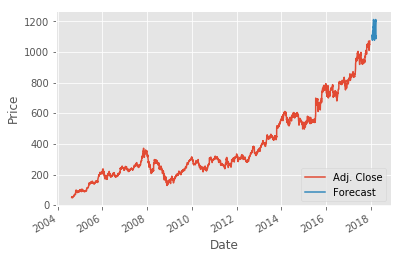

In [17]:

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    print(next_date)
    next_unix += 86400
    #loc will looking for index in dataframe with the value in [] if not found it will just creat that one
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i] # nan for all columns except the last col

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()